# Customer Segmentation Kmeans

### Prodigy Infotech

#### Intership Task 2

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
# libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# copy of data
df=data.copy()

In [4]:
# null values 
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# duplicates
df.duplicated().sum()

0

In [6]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# description
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.describe(include=object)

,Gender
count,200
unique,2
top,Female
freq,112


In [9]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### Visualization of the data 

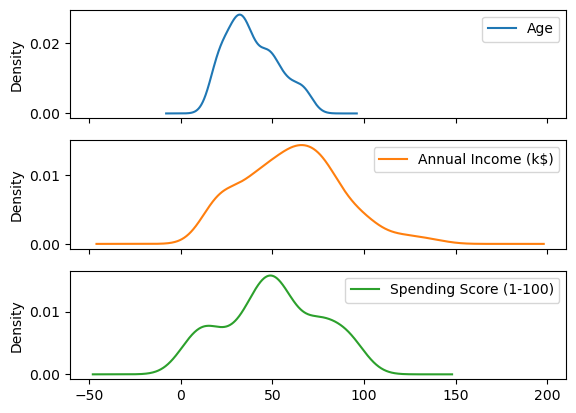

In [10]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].plot(kind='kde',subplots=True)
plt.show()

In [11]:
df.Age.mode()

0    32
Name: Age, dtype: int64

In [12]:
df['Annual Income (k$)'].mode()

0    54
1    78
Name: Annual Income (k$), dtype: int64

In [13]:
df['Spending Score (1-100)'].mode()

0    42
Name: Spending Score (1-100), dtype: int64

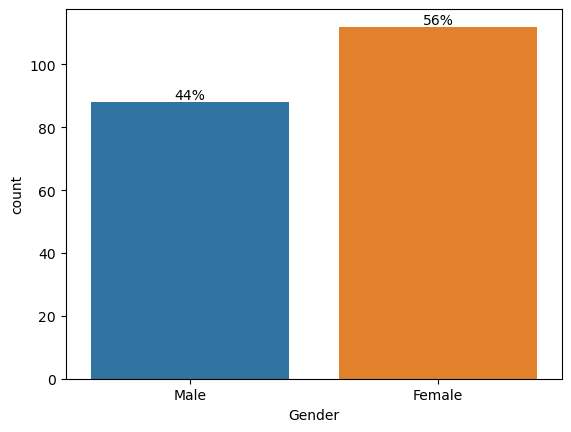

In [14]:
ax=sns.countplot(x=df['Gender'])
for i in ax.patches:
    x=i.get_bbox().get_points()[:,0]
    y=i.get_bbox().get_points()[1,1]
    ax.annotate("{:.3g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
plt.show()

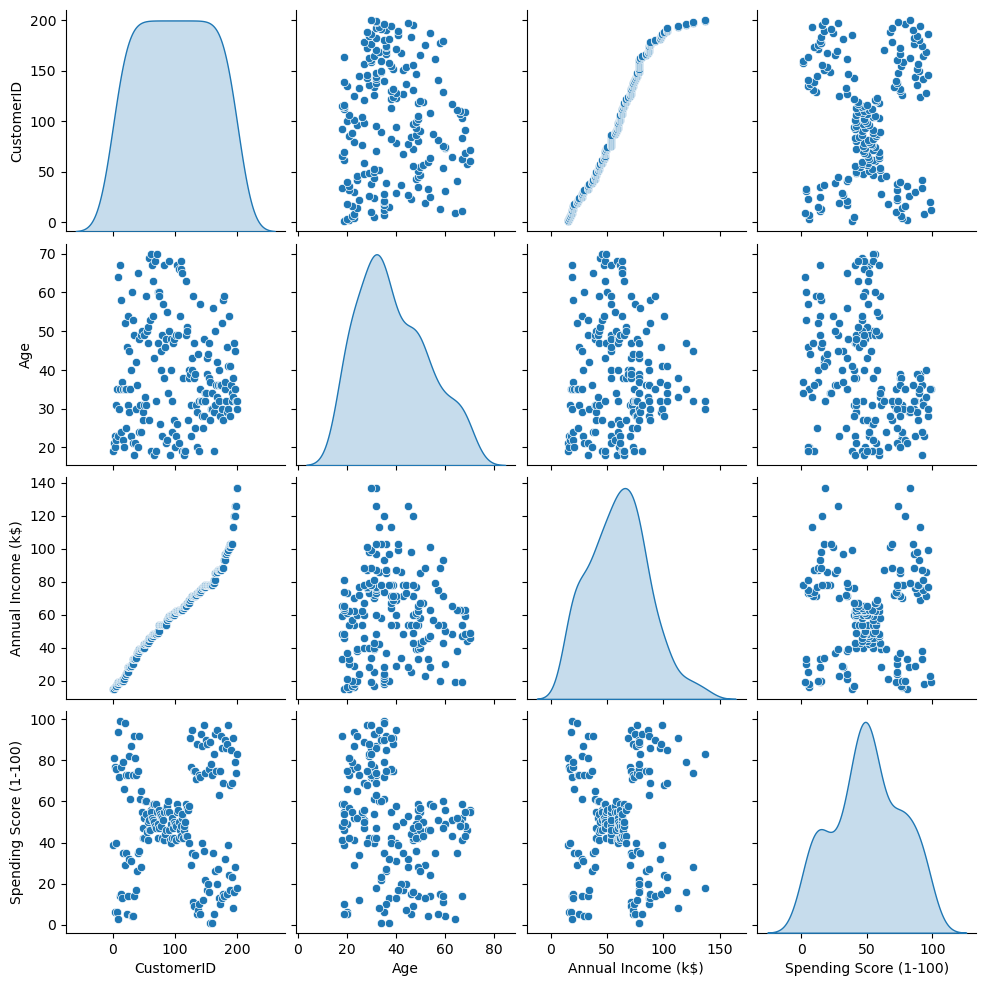

In [15]:
sns.pairplot(df, diag_kind='kde')
plt.show()

### Scaling

In [16]:
sc=StandardScaler()
scaled_df=pd.DataFrame(sc.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']]), columns=['Age','Annual Income','Spending Score'])
scaled_df

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [17]:
scaled_df['Gender']=df['Gender'].map({'Male':1,'Female':0})

### Value of k

In [18]:
wcss=[]
for i in range(1,18):
    kMeans=KMeans(n_clusters=i)
    kMeans.fit(scaled_df)
    wcss.append(kMeans.inertia_)
print(wcss)

[649.28, 438.5224115567775, 344.40542886953494, 254.28290726083475, 216.7849015165104, 181.9514362434146, 164.80626856108853, 150.75438029921037, 141.77590821132497, 131.2995881966229, 119.07217417789174, 114.32720665047832, 105.03583102348276, 97.54368857193313, 92.61437704881439, 85.80336695282838, 82.52736701256298]


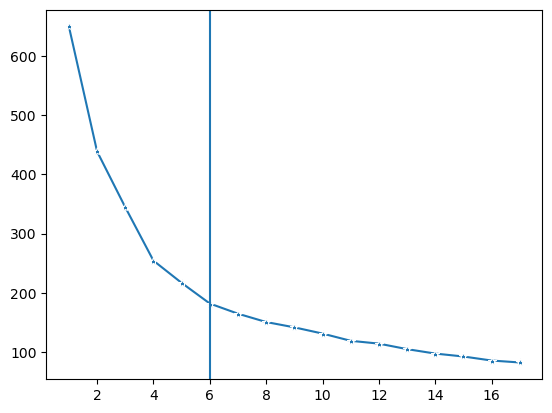

In [19]:
# elbow plot
sns.lineplot(x=range(1,18),y=wcss,marker='*')
plt.axvline(6)
plt.show()

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
for i in range(2,10):
    kmmodel=KMeans(n_clusters=i, n_init=5, random_state=0, verbose=1)
    a=kmmodel.fit_predict(scaled_df)
    print('\n Silhouette score with {} clusters:'.format(i),silhouette_score(scaled_df, a),'\n')

Initialization complete
Iteration 0, inertia 756.7322202958852.
Iteration 1, inertia 480.9365291869484.
Iteration 2, inertia 450.8743769533505.
Iteration 3, inertia 440.38044815739477.
Iteration 4, inertia 438.5224115567775.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 833.5261673019256.
Iteration 1, inertia 515.8631847102347.
Iteration 2, inertia 514.346269795736.
Iteration 3, inertia 513.2434121625001.
Iteration 4, inertia 511.9822377185472.
Iteration 5, inertia 511.2422916946217.
Iteration 6, inertia 506.15402695887707.
Iteration 7, inertia 493.1050805135298.
Iteration 8, inertia 457.6719738741074.
Iteration 9, inertia 441.0828808909619.
Iteration 10, inertia 438.77663971558155.
Iteration 11, inertia 438.5224115567775.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 947.9695377336546.
Iteration 1, inertia 463.51415963109395.
Iteration 2, inertia 443.48897841616366.
Iteration 3, inertia 439.8812

Iteration 8, inertia 182.0415390799477.
Iteration 9, inertia 181.9514362434146.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 328.79717889477786.
Iteration 1, inertia 245.13331450345825.
Iteration 2, inertia 228.16178113509767.
Iteration 3, inertia 217.3494773941475.
Iteration 4, inertia 210.38695484108192.
Iteration 5, inertia 209.3420560996036.
Iteration 6, inertia 209.03412127059772.
Iteration 7, inertia 208.85275342476382.
Iteration 8, inertia 208.68003269883488.
Converged at iteration 8: strict convergence.

 Silhouette score with 6 clusters: 0.356485834425401 

Initialization complete
Iteration 0, inertia 274.21696630518716.
Iteration 1, inertia 172.01931109114992.
Iteration 2, inertia 165.11815682969424.
Iteration 3, inertia 164.77249848423293.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 282.88866338231566.
Iteration 1, inertia 197.54902775323026.
Iteration 2, inertia 194.3163404258373.
I

In [22]:
KMeans_model=KMeans(n_clusters=6, n_init=5, random_state=0, verbose=1)

In [23]:
KMeans_model.fit(scaled_df)

Initialization complete
Iteration 0, inertia 336.89151772215075.
Iteration 1, inertia 204.20895709127313.
Iteration 2, inertia 198.8048731402846.
Iteration 3, inertia 197.95654822656803.
Iteration 4, inertia 197.45287743310078.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 286.0745213103442.
Iteration 1, inertia 200.83306224469544.
Iteration 2, inertia 197.93429120980161.
Iteration 3, inertia 197.70449114037805.
Iteration 4, inertia 197.50965283766016.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 259.49200477244915.
Iteration 1, inertia 189.30258251071442.
Iteration 2, inertia 184.3751628397903.
Iteration 3, inertia 183.73451817081695.
Iteration 4, inertia 183.17982875071868.
Iteration 5, inertia 182.86909565500724.
Iteration 6, inertia 182.56727908195097.
Iteration 7, inertia 182.22684470641957.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 346.477785

KMeans(n_clusters=6, n_init=5, random_state=0, verbose=1)

In [24]:
KMeans_model.inertia_

181.9514362434146

In [25]:
KMeans_model.labels_

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 0,
       4, 2, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 5, 1, 5, 1, 5, 1,
       0, 1, 5, 1, 5, 1, 5, 1, 5, 1, 0, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 3, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1])

In [26]:
KMeans_model.cluster_centers_

array([[-0.85043527, -0.14894113, -0.04147777,  0.34210526],
       [-0.44191719,  0.99158305,  1.23950275,  0.46153846],
       [-0.99396865, -1.34734766,  1.06404834,  0.43478261],
       [ 1.25472096, -0.24021294, -0.04399777,  0.42222222],
       [ 0.47895722, -1.30822992, -1.19644353,  0.38095238],
       [ 0.17329545,  1.06645385, -1.2980103 ,  0.58823529]])

In [27]:
df['label']=KMeans_model.labels_

In [28]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


### Analysis

In [29]:
# 0
df[df['label']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,38.0,90.052632,26.689351,44.0,69.25,93.0,112.75,143.0
Age,38.0,27.000000,7.032742,18.0,21.00,26.5,31.75,40.0
Annual Income (k$),38.0,56.657895,9.905708,39.0,48.00,59.5,63.75,76.0
Spending Score (1-100),38.0,49.131579,7.853975,29.0,42.00,50.0,55.00,61.0
label,38.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [30]:
# 1
df[df['label']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,39.0,162.000000,22.803509,124.0,143.0,162.0,181.0,200.0
Age,39.0,32.692308,3.728650,27.0,30.0,32.0,35.5,40.0
Annual Income (k$),39.0,86.538462,16.312485,69.0,75.5,79.0,95.0,137.0
Spending Score (1-100),39.0,82.128205,9.364489,63.0,74.5,83.0,90.0,97.0
label,39.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [31]:
#2
df[df['label']==2].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,23.0,22.130435,13.645860,1.0,11.0,22.0,33.0,46.0
Age,23.0,25.000000,5.300086,18.0,21.0,23.0,29.5,35.0
Annual Income (k$),23.0,25.260870,7.723738,15.0,19.0,24.0,31.5,39.0
Spending Score (1-100),23.0,77.608696,13.272457,39.0,73.0,77.0,84.5,99.0
label,23.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [32]:
#3
df[df['label']==3].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,45.0,83.777778,24.911561,41.0,64.0,81.0,103.0,161.0
Age,45.0,56.333333,8.453079,43.0,49.0,54.0,65.0,70.0
Annual Income (k$),45.0,54.266667,8.975725,38.0,47.0,54.0,62.0,79.0
Spending Score (1-100),45.0,49.066667,6.300794,35.0,45.0,49.0,55.0,60.0
label,45.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


In [33]:
#4
df[df['label']==4].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,21.0,23.190476,12.726425,3.0,13.0,23.0,33.0,45.0
Age,21.0,45.523810,11.766984,20.0,36.0,46.0,53.0,67.0
Annual Income (k$),21.0,26.285714,7.437357,16.0,20.0,25.0,33.0,39.0
Spending Score (1-100),21.0,19.380952,12.555780,3.0,6.0,15.0,31.0,40.0
label,21.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


In [34]:
#5
df[df['label']==5].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,34.0,164.529412,21.664432,127.0,147.50,166.0,182.50,199.0
Age,34.0,41.264706,10.768385,19.0,34.50,42.5,47.00,59.0
Annual Income (k$),34.0,88.500000,16.533254,71.0,77.25,85.5,97.75,137.0
Spending Score (1-100),34.0,16.764706,9.881292,1.0,10.00,15.5,22.75,39.0
label,34.0,5.000000,0.000000,5.0,5.00,5.0,5.00,5.0


### Inference